# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [9]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [10]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [4]:
df.head()

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [4]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

In [3]:
import sys
sys.path.append('/home/fvalens11/sklearn-env/lib/python3.12/site-packages')

import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as DA

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [21]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]


Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [23]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

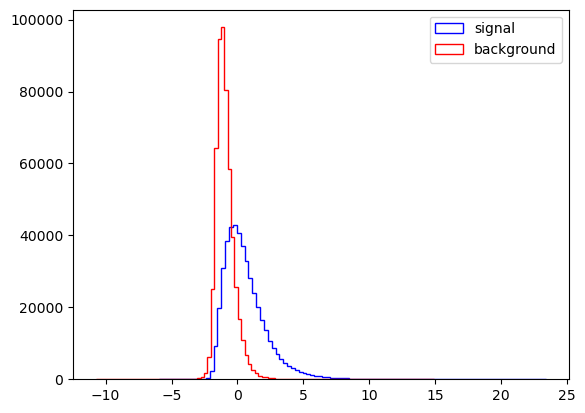

In [24]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

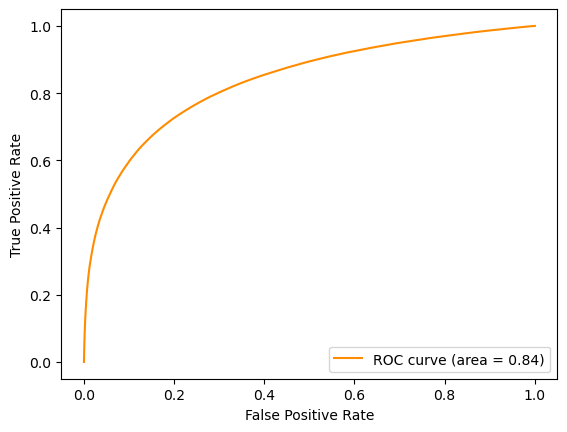

In [25]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

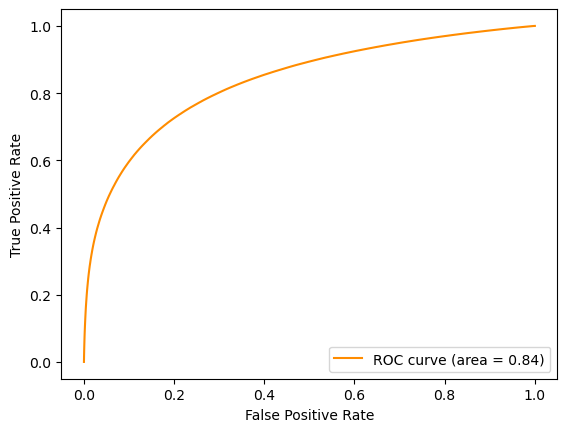

In [26]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [15]:
#There's no bias between the 2 #

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [33]:
raw_vars = VarNames[1:9]       
feat_vars = VarNames[9:19]      
all_vars = VarNames[1:19]

In [15]:
import sklearn.discriminant_analysis as DA
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

N_Train = 400000

Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:]

VarNames = df.columns.tolist()

y_Train = Train_Sample["signal"]
y_Test = Test_Sample["signal"]

# Raw: columns 1–8
raw_vars = VarNames[1:9]

# Features: columns 9–18
feat_vars = VarNames[9:19]

# All (raw + features): columns 1–18
all_vars = VarNames[1:19]

X_Train_raw = Train_Sample[raw_vars]
X_Test_raw = Test_Sample[raw_vars]

X_Train_feat = Train_Sample[feat_vars]
X_Test_feat = Test_Sample[feat_vars]

X_Train_all = Train_Sample[all_vars]
X_Test_all = Test_Sample[all_vars]

X_Test_raw = X_Test_raw[raw_vars]       
X_Test_feat = X_Test_feat[feat_vars]    
X_Test_all = X_Test_all[all_vars]       

Fisher_raw = DA.LinearDiscriminantAnalysis()
Fisher_feat = DA.LinearDiscriminantAnalysis()
Fisher_all = DA.LinearDiscriminantAnalysis()

Fisher_raw.fit(X_Train_raw, y_Train)
Fisher_feat.fit(X_Train_feat, y_Train)
Fisher_all.fit(X_Train_all, y_Train)

y_score_raw = Fisher_raw.predict_proba(X_Test_raw)[:, 1]
y_score_feat = Fisher_feat.predict_proba(X_Test_feat)[:, 1]
y_score_all = Fisher_all.predict_proba(X_Test_all)[:, 1]

fpr_raw, tpr_raw, _ = roc_curve(y_Test, y_score_raw)
fpr_feat, tpr_feat, _ = roc_curve(y_Test, y_score_feat)
fpr_all, tpr_all, _ = roc_curve(y_Test, y_score_all)

auc_raw = auc(fpr_raw, tpr_raw)
auc_feat = auc(fpr_feat, tpr_feat)
auc_all = auc(fpr_all, tpr_all)



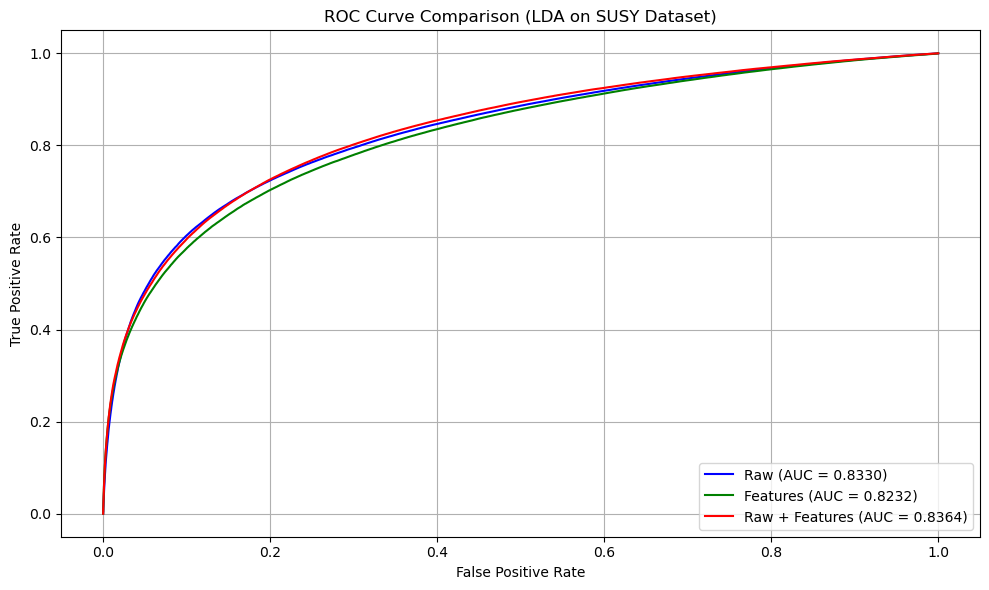

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_raw, tpr_raw, label=f'Raw (AUC = {auc_raw:.4f})', color='blue')
plt.plot(fpr_feat, tpr_feat, label=f'Features (AUC = {auc_feat:.4f})', color='green')
plt.plot(fpr_all, tpr_all, label=f'Raw + Features (AUC = {auc_all:.4f})', color='red')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (LDA on SUSY Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

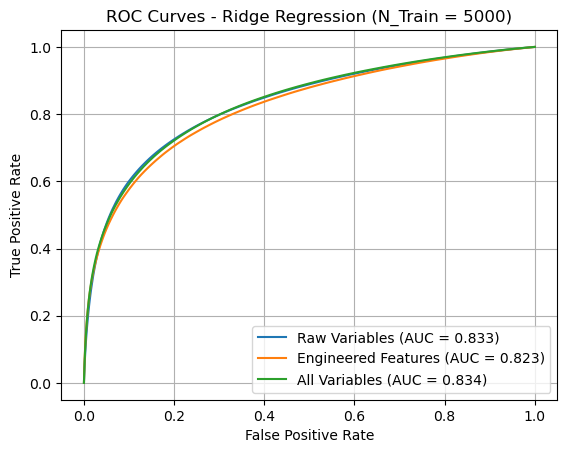

In [19]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

N_Train = 5000    #Kept this small because it kept crashing when it was bigger than 10000 #

Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:]

VarNames = df.columns.tolist()

y_Train = Train_Sample["signal"]
y_Test = Test_Sample["signal"]

# Raw: columns 1–8
raw_vars = VarNames[1:9]

# Features: columns 9–18
feat_vars = VarNames[9:19]

# All (raw + features): columns 1–18
all_vars = VarNames[1:19]

X_Train_raw = Train_Sample[raw_vars]
X_Test_raw = Test_Sample[raw_vars]

X_Train_feat = Train_Sample[feat_vars]
X_Test_feat = Test_Sample[feat_vars]

X_Train_all = Train_Sample[all_vars]
X_Test_all = Test_Sample[all_vars]

ridge_raw = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_feat = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_all = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

ridge_raw.fit(X_Train_raw, y_Train)
ridge_feat.fit(X_Train_feat, y_Train)
ridge_all.fit(X_Train_all, y_Train)

y_score_raw = ridge_raw.predict(X_Test_raw)
y_score_feat = ridge_feat.predict(X_Test_feat)
y_score_all = ridge_all.predict(X_Test_all)

fpr_raw, tpr_raw, _ = roc_curve(y_Test, y_score_raw)
fpr_feat, tpr_feat, _ = roc_curve(y_Test, y_score_feat)
fpr_all, tpr_all, _ = roc_curve(y_Test, y_score_all)

auc_raw = auc(fpr_raw, tpr_raw)
auc_feat = auc(fpr_feat, tpr_feat)
auc_all = auc(fpr_all, tpr_all)

plt.figure()
plt.plot(fpr_raw, tpr_raw, label=f'Raw Variables (AUC = {auc_raw:.3f})')
plt.plot(fpr_feat, tpr_feat, label=f'Engineered Features (AUC = {auc_feat:.3f})')
plt.plot(fpr_all, tpr_all, label=f'All Variables (AUC = {auc_all:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Ridge Regression (N_Train = 5000)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [20]:
import numpy as np

n_bkg_expected = 10000
n_sig_expected = 1000

def compute_max_sig(fpr, tpr, label):
    n_sig_prime = n_sig_expected * tpr
    n_bkg_prime = n_bkg_expected * fpr
    with np.errstate(divide='ignore', invalid='ignore'):
        sig = np.where(n_sig_prime + n_bkg_prime > 0,
                       n_sig_prime / np.sqrt(n_sig_prime + n_bkg_prime),
                       0)
    max_sig = np.max(sig)
    max_idx = np.argmax(sig)
    best_tpr = tpr[max_idx]
    best_fpr = fpr[max_idx]
    print(f"Max Significance for {label}: {max_sig:.3f}")
    print(f"  → TPR: {best_tpr:.3f}, FPR: {best_fpr:.3f}\n")
    return max_sig, best_tpr, best_fpr

max_sig_raw, _, _ = compute_max_sig(fpr_raw, tpr_raw, "Raw Variables")
max_sig_feat, _, _ = compute_max_sig(fpr_feat, tpr_feat, "Engineered Features")
max_sig_all, _, _ = compute_max_sig(fpr_all, tpr_all, "All Variables")


Max Significance for Raw Variables: 15.245
  → TPR: 0.517, FPR: 0.063

Max Significance for Engineered Features: 14.809
  → TPR: 0.458, FPR: 0.050

Max Significance for All Variables: 15.126
  → TPR: 0.489, FPR: 0.056



### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    roc_curve, auc, precision_score, recall_score,
    f1_score, accuracy_score
)
from tabulate import tabulate

models = {
    "Raw Variables": make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
    "Engineered Features": make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
    "All Variables": make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
}

models["Raw Variables"].fit(X_Train_raw, y_Train)
models["Engineered Features"].fit(X_Train_feat, y_Train)
models["All Variables"].fit(X_Train_all, y_Train)

X_tests = {
    "Raw Variables": X_Test_raw,
    "Engineered Features": X_Test_feat,
    "All Variables": X_Test_all,
}

results = []

for label, model in models.items():
    y_scores = model.predict(X_tests[label])
    
    y_pred = (y_scores >= 0.5).astype(int)

    fpr, tpr, _ = roc_curve(y_Test, y_scores)
    model_auc = auc(fpr, tpr)

    precision = precision_score(y_Test, y_pred)
    recall = recall_score(y_Test, y_pred)
    f1 = f1_score(y_Test, y_pred)
    accuracy = accuracy_score(y_Test, y_pred)

    results.append([
        label,
        f"{tpr[-1]:.3f}",         
        f"{fpr[-1]:.3f}",         
        f"{model_auc:.3f}",
        f"{precision:.3f}",
        f"{recall:.3f}",
        f"{f1:.3f}",
        f"{accuracy:.3f}"
    ])

headers = ["Model", "TPR", "FPR", "AUC", "Precision", "Recall", "F1 Score", "Accuracy"]
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))


╒═════════════════════╤═══════╤═══════╤═══════╤═════════════╤══════════╤════════════╤════════════╕
│ Model               │   TPR │   FPR │   AUC │   Precision │   Recall │   F1 Score │   Accuracy │
╞═════════════════════╪═══════╪═══════╪═══════╪═════════════╪══════════╪════════════╪════════════╡
│ Raw Variables       │     1 │     1 │ 0.833 │       0.867 │    0.532 │       0.66 │      0.749 │
├─────────────────────┼───────┼───────┼───────┼─────────────┼──────────┼────────────┼────────────┤
│ Engineered Features │     1 │     1 │ 0.823 │       0.84  │    0.557 │       0.67 │      0.749 │
├─────────────────────┼───────┼───────┼───────┼─────────────┼──────────┼────────────┼────────────┤
│ All Variables       │     1 │     1 │ 0.834 │       0.845 │    0.568 │       0.68 │      0.755 │
╘═════════════════════╧═══════╧═══════╧═══════╧═════════════╧══════════╧════════════╧════════════╛
